## AutoEncoder

the goal here is to build an AutoEncoder (AE). We will explore three different settings. First a classical AE where we impose that output correspond to the input. In a second setting we will see how we can design a denoising machine using the AE. Finally we will try to see if we can use the AE to make a small counter.

### Classical Autoencoder. 

The Autoencoder is a simple neural network with one hidden layer and an output of the size of the input. In order to familiarize with it, you can use the two following cells:

In [1]:
# Loading database
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

f = gzip.open('../../M1Pro-ML/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, valid_set, test_set = p

In [6]:
# import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [7]:
# AE

# shape of the input
size_im = 784

# we define a first layer of inputs
input_img = Input(shape=(size_im,))
HiddL = Dense(200,activation='relu')(input_img)
# and a layer of output
output = Dense(784, activation='sigmoid')(HiddL)

# On assemble le modèle
AE = Model(input_img, output)
AE.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 784)               157584    
Total params: 314,584
Trainable params: 314,584
Non-trainable params: 0
_________________________________________________________________


In [8]:
# On implémente le modèle, en précisant qu'on fait du gradient stochastique et qu'on veut classifier en utilisant la bonne fonction de loss
AE.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
list_idx = []
list_idx_t = []
for i in range(10):
    idx = np.where(train_set[1]==i)[0]
    list_idx.append(idx)
    
    idx_t = np.where(test_set[1]==i)[0]
    list_idx_t.append(idx_t)

In [10]:
train_set[0].shape
Xi = np.zeros((10000,784))
Xt = np.zeros((10000,784))

# creating the training set
for i in range(10000):
    dig_i = np.random.randint(10)
    dig_t = (dig_i+1)%10
    Xi[i,:] = train_set[0][list_idx[dig_i][np.random.randint(list_idx[dig_i].shape[0])],:]
    Xt[i,:] = train_set[0][list_idx[dig_t][np.random.randint(list_idx[dig_t].shape[0])],:]

# creating the test set
Xi_t = np.zeros((1000,784))
Xt_t = np.zeros((1000,784))
for i in range(1000):
    dig_i = np.random.randint(10)
    dig_t = (dig_i+1)%10
    Xi_t[i,:] = test_set[0][list_idx_t[dig_i][np.random.randint(list_idx_t[dig_i].shape[0])],:]
    Xt_t[i,:] = test_set[0][list_idx_t[dig_t][np.random.randint(list_idx_t[dig_t].shape[0])],:]

In [11]:
# pour la seconde partie
noise_factor = 0.7
X_train_noisy = train_set[0] * np.random.binomial(1,1-noise_factor, size=train_set[0].shape)
X_test_noisy = test_set[0] * np.random.binomial(1,1-noise_factor, size=test_set[0].shape)

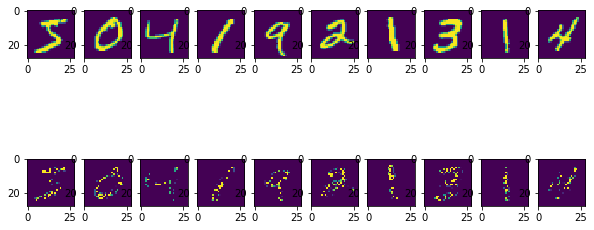

In [12]:
f,ax = plt.subplots(2,10,figsize=(10,5))
for i in range(10):
    ax[0,i].imshow(train_set[0][i,:].reshape(28,28))
    ax[1,i].imshow(X_train_noisy[i,:].reshape(28,28))

In [5]:
# import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aurele/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [13]:
# AE

# shape of the input
size_im = 784

# we define a first layer of inputs
input_img = Input(shape=(size_im,))
# Hidd_l1 = Dense(200,activation='relu')(input_img)
Hidd_l = Dense(200,activation='relu')(input_img)
# Hidd_l3 = Dense(200,activation='relu')(Hidd_l2)
# and a layer of output
output = Dense(784, activation='sigmoid')(Hidd_l)

# On assemble le modèle
AE = Model(input_img, output)
AE.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 784)               157584    
Total params: 314,584
Trainable params: 314,584
Non-trainable params: 0
_________________________________________________________________


In [14]:
# On implémente le modèle, en précisant qu'on fait du gradient stochastique et qu'on veut classifier en utilisant la bonne fonction de loss
AE.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [14]:
AE.fit(X_train_noisy, train_set[0],
                epochs=50,
                batch_size=32,
                shuffle=True)

Epoch 1/50
50000/50000 [==============================] - 28s 562us/sample - loss: 0.1771 - acc: 0.7986
Epoch 2/50
50000/50000 [==============================] - 30s 592us/sample - loss: 0.1371 - acc: 0.8041
Epoch 3/50
50000/50000 [==============================] - 30s 608us/sample - loss: 0.1297 - acc: 0.8048
Epoch 4/50
 6528/50000 [==>...........................] - ETA: 27s - loss: 0.1260 - acc: 0.8053

KeyboardInterrupt: 

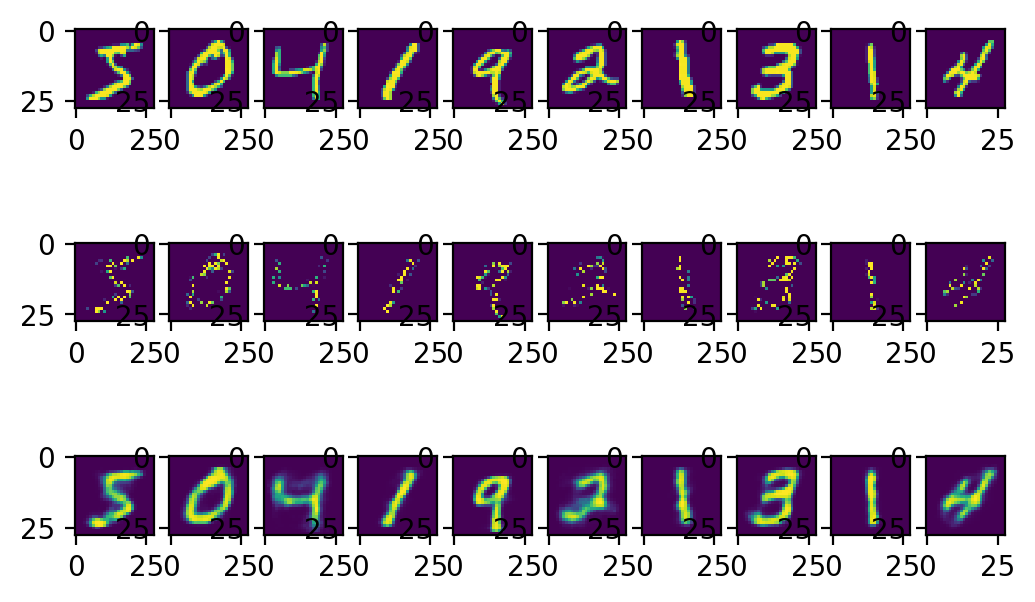

In [15]:
AE_p = AE.predict(X_train_noisy[:10,:])
f,ax = plt.subplots(3,10,dpi=200)
for i in range(10):
    ax[0,i].imshow(train_set[0][i,:].reshape(28,28))
    ax[1,i].imshow(X_train_noisy[i,:].reshape(28,28))
    ax[2,i].imshow(AE_p[i,:].reshape(28,28))

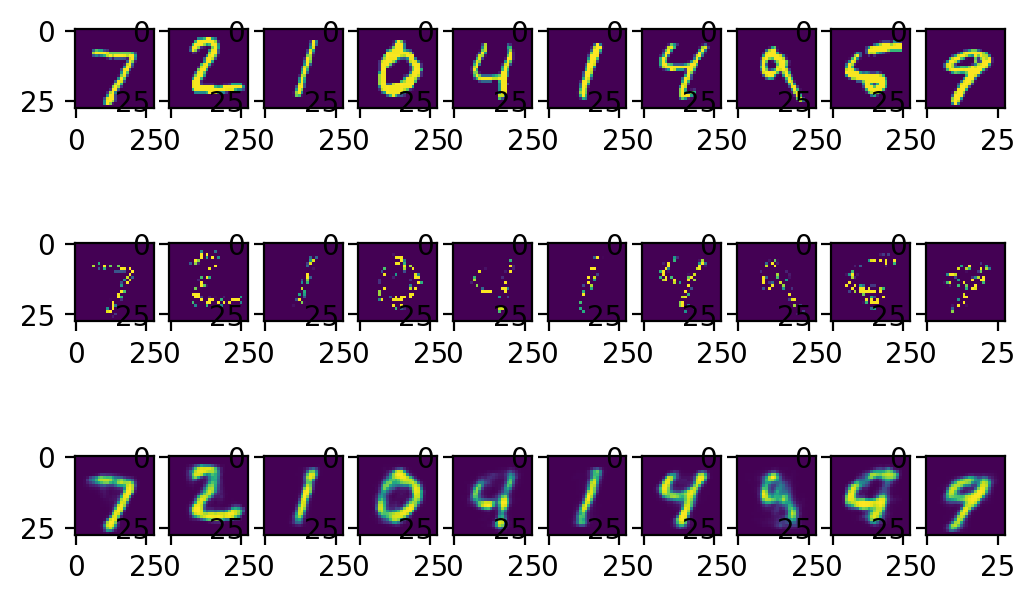

In [21]:
AE_p = AE.predict(X_test_noisy[:10,:])
f,ax = plt.subplots(3,10,dpi=200)
for i in range(10):
    ax[0,i].imshow(test_set[0][i,:].reshape(28,28))
    ax[1,i].imshow(X_test_noisy[i,:].reshape(28,28))
    ax[2,i].imshow(AE_p[i,:].reshape(28,28))

In [15]:
AE.fit(Xi, Xt,
        epochs=50,
        batch_size=32,
        shuffle=True)

Epoch 1/50
10000/10000 [==============================] - 2s 223us/sample - loss: 0.2681 - acc: 0.7860
Epoch 2/50
10000/10000 [==============================] - 2s 213us/sample - loss: 0.2394 - acc: 0.7890
Epoch 3/50
10000/10000 [==============================] - 2s 170us/sample - loss: 0.2347 - acc: 0.7893
Epoch 4/50
10000/10000 [==============================] - 2s 186us/sample - loss: 0.2322 - acc: 0.7894
Epoch 5/50
10000/10000 [==============================] - 2s 162us/sample - loss: 0.2305 - acc: 0.7894
Epoch 6/50
10000/10000 [==============================] - 2s 174us/sample - loss: 0.2290 - acc: 0.7896
Epoch 7/50
10000/10000 [==============================] - 2s 171us/sample - loss: 0.2279 - acc: 0.7895
Epoch 8/50
10000/10000 [==============================] - 2s 162us/sample - loss: 0.2268 - acc: 0.7896
Epoch 9/50
10000/10000 [==============================] - 2s 189us/sample - loss: 0.2257 - acc: 0.7898
Epoch 10/50
10000/10000 [==============================] - 2s 173us/sampl

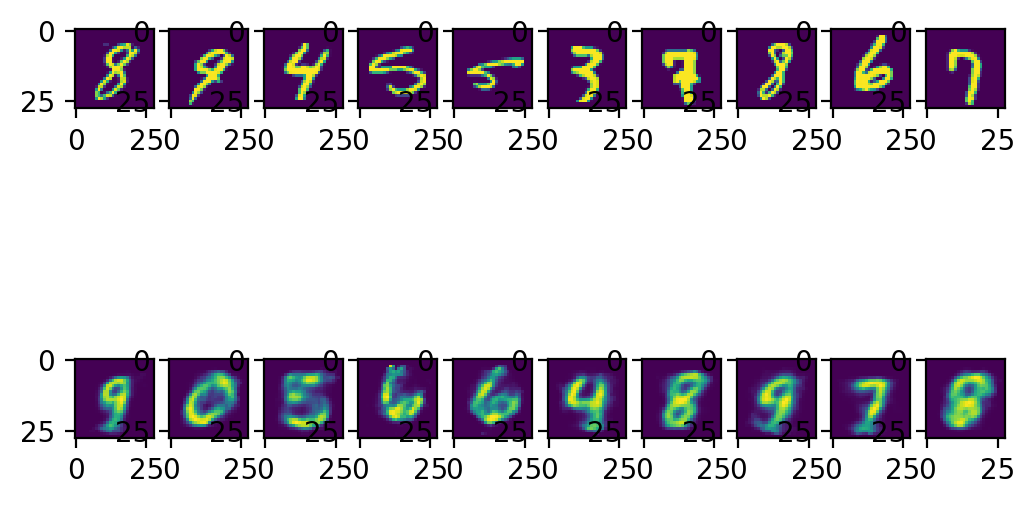

In [16]:
AE_p = AE.predict(Xi[:10,:])
f,ax = plt.subplots(2,10,dpi=200)
for i in range(10):
    ax[0,i].imshow(Xi[i,:].reshape(28,28))
    ax[1,i].imshow(AE_p[i,:].reshape(28,28))

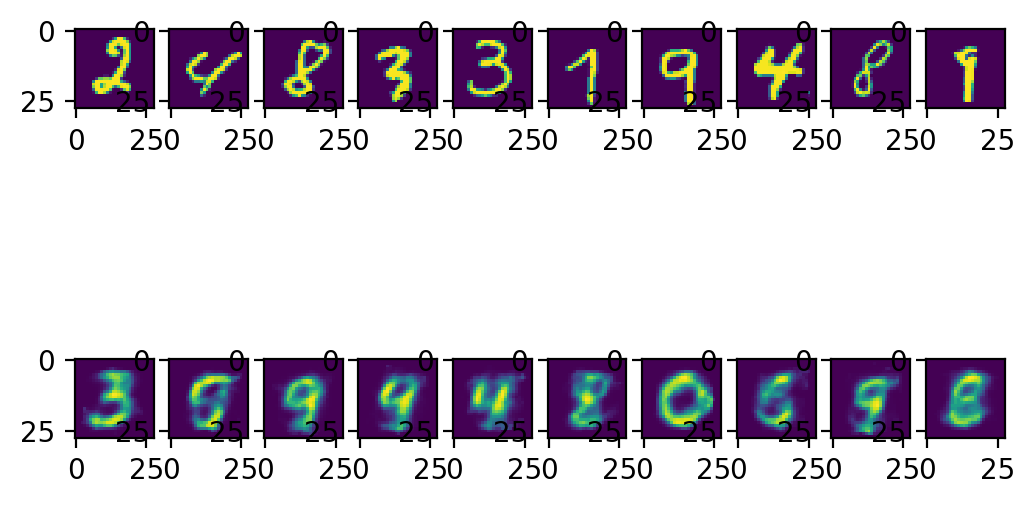

In [17]:
AE_p = AE.predict(Xi_t[:10,:])
f,ax = plt.subplots(2,10,dpi=200)
for i in range(10):
    ax[0,i].imshow(Xi_t[i,:].reshape(28,28))
    ax[1,i].imshow(AE_p[i,:].reshape(28,28))

In [19]:
AE.evaluate(Xi,Xt)

10000/10000 [==============================] - 1s 121us/sample - loss: 0.1920 - acc: 0.7905


[0.19195253348350524, 0.7904897]

In [20]:
AE.evaluate(Xi_t,Xt_t)

1000/1000 [==============================] - 0s 164us/sample - loss: 0.2584 - acc: 0.7774


[0.25837353157997134, 0.7774337]

In [22]:
Xi_t.shape

(1000, 784)